출판과의 시간차에 따른 관계

In [20]:
import numpy as np
import pandas as pd
from db_handler import DBHandler
from matplotlib import pyplot as plt
from scipy import stats
from datetime import datetime, timedelta
from calendar import monthrange
%matplotlib inline

def parse_fetches(fetches):
    _new_fetches = list()
    for _fetch in fetches:
        for _doi in _fetch[0].split(", "):
            _new_fetches.append(
                (_doi, _fetch[1])
            )
    return _new_fetches

def get_dois_with_videos_within_days_from_publish(df, table_name, days_from=None, days_until=None):
#     複数の動画が与えられる論文の場合、複数のsetに含まれることがある。
    _set_target_dois = set()
    db_handler.sql_handler.select(table_name, ["idx_paper", "publishedAt"])
    fetches = db_handler.execute().fetchall()
    fetches = parse_fetches(fetches)
    
    for _row in fetches:
#         print("DOI:", _row[0])
        _target_paper = df[df["DOI"] == _row[0]]
#         if len(_target_paper) == 0:
#             continue
        if len(_target_paper) > 1:
            _target_paper = _target_paper.iloc[0]
#         print(_target_paper)
        _dt_publish = datetime(_target_paper["Year"], _target_paper["Month"], 1)
        
        if days_from != None:
            _dt_video_from = _dt_publish + timedelta(days=days_from)
            if _row[1] < _dt_video_from:
                continue
        
        if days_until != None:
            _dt_video_until = _dt_publish + timedelta(days=days_until)
            if _row[1] > _dt_video_until:
                continue
        
        _set_target_dois.add(_row[0])
    
#     if days_until == None:
#         _set_target_dois = set(map(lambda _row: _row[0], fetches))
#     else:
#         for _row in fetches:
#             _target_paper = df[df["DOI"] == _row[0]]
#             if len(_target_paper) > 1:
#                 _target_paper = _target_paper.iloc[0]
#             _dt_publish = datetime(_target_paper["Year"], _target_paper["Month"], 1)
            
#             _dt_video_from = _dt_publish + timedelta(days=days_from)
#             _dt_video_until = _dt_publish + timedelta(days=days_until)
            
#             if _row[1] < _dt_video_deadline:
#                 _set_target_dois.add(_row[0])
    
    return _set_target_dois

In [2]:
df1 = pd.read_csv("/home/hweem/git/mastersdegree/ytcrawl/customs/scopus/scopus_math+comp_top5perc_1901-1906.csv")
df2 = pd.read_csv("/home/hweem/git/mastersdegree/ytcrawl/customs/scopus/scopus_math+comp_top5perc_1701-1706.csv")
df3 = pd.read_csv("/home/hweem/git/mastersdegree/ytcrawl/customs/scopus/scopus_math+comp_top5perc_1401-1406.csv")
db_handler = DBHandler()

In [3]:
db_handler.sql_handler.select("scopus_videos_2014_comp", ["idx_paper", "publishedAt"])
_videos_2014 = db_handler.execute().fetchall()
db_handler.sql_handler.select("scopus_videos_2017_comp", ["idx_paper", "publishedAt"])
_videos_2017 = db_handler.execute().fetchall()
db_handler.sql_handler.select("scopus_videos_2019_comp", ["idx_paper", "publishedAt"])
_videos_2019 = db_handler.execute().fetchall()

	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`;
	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2017_comp`
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2017_comp`;
	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`;


In [4]:
# _idx_papers_2019 = get_dois_with_videos_within_days_from_publish(df1, "scopus_videos_2019_comp")
# _idx_papers_2019_90 = get_dois_with_videos_within_days_from_publish(df1, "scopus_videos_2019_comp", None, 90)
# print(len(_idx_papers_2019), len(_idx_papers_2019_90))
# _idx_papers_2017 = get_dois_with_videos_within_days_from_publish(df2, "scopus_videos_2017_comp")
# _idx_papers_2017_90 = get_dois_with_videos_within_days_from_publish(df2, "scopus_videos_2017_comp", None, 90)
# print(len(_idx_papers_2017), len(_idx_papers_2017_90))
_idx_papers_2014 = get_dois_with_videos_within_days_from_publish(df3, "scopus_videos_2014_comp")
_idx_papers_2014_90 = get_dois_with_videos_within_days_from_publish(df3, "scopus_videos_2014_comp", None, 90)
_idx_papers_2014_180 = get_dois_with_videos_within_days_from_publish(df3, "scopus_videos_2014_comp", 90, 180)
_idx_papers_2014_270 = get_dois_with_videos_within_days_from_publish(df3, "scopus_videos_2014_comp", 180, 270)
_idx_papers_2014_360 = get_dois_with_videos_within_days_from_publish(df3, "scopus_videos_2014_comp", 270, 360)
_idx_papers_2014_rest = get_dois_with_videos_within_days_from_publish(df3, "scopus_videos_2014_comp", 360, None)
print(len(_idx_papers_2014), len(_idx_papers_2014_90), len(_idx_papers_2014_180), len(_idx_papers_2014_270), len(_idx_papers_2014_360), len(_idx_papers_2014_rest))

	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`;
	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`;
	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`;
	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`;
	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`;
	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`;
102 25 35 7 0 39


/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/

{'boxes': [<matplotlib.lines.Line2D at 0x7ff748025470>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff748025c18>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff74802c630>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff74802c2e8>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff748025588>,
  <matplotlib.lines.Line2D at 0x7ff748058d68>]}

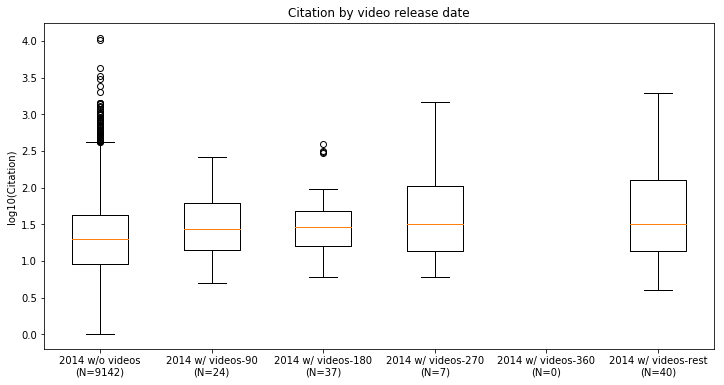

In [35]:
# _2019_90_wo_videos_cit = df1[~df1.DOI.isin(_idx_papers_2019_90)][df1["Cited by"] != "None"]["Cited by"].dropna().astype(int)
# _2019_90_w_videos_cit = df1[df1.DOI.isin(_idx_papers_2019_90)][df1["Cited by"] != "None"]["Cited by"].dropna().astype(int)
# _2017_90_wo_videos_cit = df2[~df2.DOI.isin(_idx_papers_2017_90)][df2["Cited by"] != "None"]["Cited by"].dropna().astype(int)
# _2017_90_w_videos_cit = df2[df2.DOI.isin(_idx_papers_2017_90)][df2["Cited by"] != "None"]["Cited by"].dropna().astype(int)
# _2014_wo_videos_cit = df3[~df3.DOI.isin(_idx_papers_2014)][df3["Cited by"] != "None"]["Cited by"].dropna().astype(int)
# _2014_90_w_videos_cit = df3[df3.DOI.isin(_idx_papers_2014_90)][df3["Cited by"] != "None"]["Cited by"].dropna().astype(int)
# _2014_180_w_videos_cit = df3[df3.DOI.isin(_idx_papers_2014_180)][df3["Cited by"] != "None"]["Cited by"].dropna().astype(int)
# _2014_270_w_videos_cit = df3[df3.DOI.isin(_idx_papers_2014_270)][df3["Cited by"] != "None"]["Cited by"].dropna().astype(int)
# _2014_360_w_videos_cit = df3[df3.DOI.isin(_idx_papers_2014_360)][df3["Cited by"] != "None"]["Cited by"].dropna().astype(int)
# _2014_rest_w_videos_cit = df3[df3.DOI.isin(_idx_papers_2014_rest)][df3["Cited by"] != "None"]["Cited by"].dropna().astype(int)

_2014_wo_videos_cit = np.log10(df3[~df3.DOI.isin(_idx_papers_2014)][df3["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2014_90_w_videos_cit = np.log10(df3[df3.DOI.isin(_idx_papers_2014_90)][df3["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2014_180_w_videos_cit = np.log10(df3[df3.DOI.isin(_idx_papers_2014_180)][df3["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2014_270_w_videos_cit = np.log10(df3[df3.DOI.isin(_idx_papers_2014_270)][df3["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2014_360_w_videos_cit = np.log10(df3[df3.DOI.isin(_idx_papers_2014_360)][df3["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2014_rest_w_videos_cit = np.log10(df3[df3.DOI.isin(_idx_papers_2014_rest)][df3["Cited by"] != "None"]["Cited by"].dropna().astype(int))

plt.figure(figsize=(12, 6))
plt.title("Citation by video release date")
# plt.yscale("log")
# plt.ylim([0, 200])
plt.ylabel("log10(Citation)")
plt.boxplot([
    _2014_wo_videos_cit,
    _2014_90_w_videos_cit,
    _2014_180_w_videos_cit,
    _2014_270_w_videos_cit,
    _2014_360_w_videos_cit,
    _2014_rest_w_videos_cit
],
    labels=[
        "2014 w/o videos\n(N=%s)"%len(_2014_wo_videos_cit),
        "2014 w/ videos-90\n(N=%s)"%len(_2014_90_w_videos_cit),
        "2014 w/ videos-180\n(N=%s)"%len(_2014_180_w_videos_cit),
        "2014 w/ videos-270\n(N=%s)"%len(_2014_270_w_videos_cit),
        "2014 w/ videos-360\n(N=%s)"%len(_2014_360_w_videos_cit),
        "2014 w/ videos-rest\n(N=%s)"%len(_2014_rest_w_videos_cit)
    ]
)

In [36]:
# _s2019, _p2019 = stats.ttest_ind(
#     _2019_90_wo_videos_cit,
#     _2019_90_w_videos_cit
# )
# print("2019\tS = %f\tp = %f"%(_s2019, _p2019))

# _s2017, _p2017 = stats.ttest_ind(
#     _2017_90_wo_videos_cit,
#     _2017_90_w_videos_cit
# )
# print("2017\tS = %f\tp = %f"%(_s2017, _p2017))

_s2014, _p2014 = stats.ttest_ind(
    _2014_wo_videos_cit,
    _2014_90_w_videos_cit
)
print("2014-90\tS = %f\tp = %f"%(_s2014, _p2014))
_s2014, _p2014 = stats.ttest_ind(
    _2014_wo_videos_cit,
    _2014_180_w_videos_cit
)
print("2014-180\tS = %f\tp = %f"%(_s2014, _p2014))
_s2014, _p2014 = stats.ttest_ind(
    _2014_wo_videos_cit,
    _2014_270_w_videos_cit
)
print("2014-270\tS = %f\tp = %f"%(_s2014, _p2014))
_s2014, _p2014 = stats.ttest_ind(
    _2014_wo_videos_cit,
    _2014_360_w_videos_cit
)
print("2014-360\tS = %f\tp = %f"%(_s2014, _p2014))
_s2014, _p2014 = stats.ttest_ind(
    _2014_wo_videos_cit,
    _2014_rest_w_videos_cit
)
print("2014-rest\tS = %f\tp = %f"%(_s2014, _p2014))

2014-90	S = -1.965470	p = 0.049390
2014-180	S = -2.647451	p = 0.008124
2014-270	S = -2.011884	p = 0.044261
2014-360	S = nan	p = nan
2014-rest	S = -4.130150	p = 0.000037


초창기(90)와 상당히 나중 비디오일수록 더 유의하다.

In [8]:
_idx_papers_2017 = get_dois_with_videos_within_days_from_publish(df2, "scopus_videos_2017_comp")
_idx_papers_2017_90 = get_dois_with_videos_within_days_from_publish(df2, "scopus_videos_2017_comp", None, 90)
_idx_papers_2017_180 = get_dois_with_videos_within_days_from_publish(df2, "scopus_videos_2017_comp", 90, 180)
_idx_papers_2017_270 = get_dois_with_videos_within_days_from_publish(df2, "scopus_videos_2017_comp", 180, 270)
_idx_papers_2017_360 = get_dois_with_videos_within_days_from_publish(df2, "scopus_videos_2017_comp", 270, 360)
_idx_papers_2017_rest = get_dois_with_videos_within_days_from_publish(df2, "scopus_videos_2017_comp", 360, None)
print(len(_idx_papers_2017), len(_idx_papers_2017_90), len(_idx_papers_2017_180), len(_idx_papers_2017_270), len(_idx_papers_2017_360), len(_idx_papers_2017_rest))

	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2017_comp`
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2017_comp`;
	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2017_comp`
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2017_comp`;
	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2017_comp`
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2017_comp`;
	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2017_comp`
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2017_comp`;
	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2017_comp`
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2017_comp`;
	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2017_comp`
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2017_comp`;
72 30 6 3 5 34


/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed

{'boxes': [<matplotlib.lines.Line2D at 0x7ff747fa1470>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff747fa1c18>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff747fa8630>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff747fa82e8>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff747fa1588>,
  <matplotlib.lines.Line2D at 0x7ff747fd2d68>]}

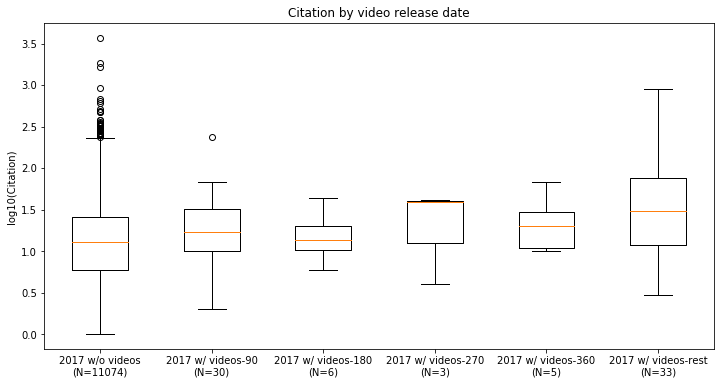

In [37]:
# _2017_wo_videos_cit = df2[~df2.DOI.isin(_idx_papers_2017)][df2["Cited by"] != "None"]["Cited by"].dropna().astype(int)
# _2017_90_w_videos_cit = df2[df2.DOI.isin(_idx_papers_2017_90)][df2["Cited by"] != "None"]["Cited by"].dropna().astype(int)
# _2017_180_w_videos_cit = df2[df2.DOI.isin(_idx_papers_2017_180)][df2["Cited by"] != "None"]["Cited by"].dropna().astype(int)
# _2017_270_w_videos_cit = df2[df2.DOI.isin(_idx_papers_2017_270)][df2["Cited by"] != "None"]["Cited by"].dropna().astype(int)
# _2017_360_w_videos_cit = df2[df2.DOI.isin(_idx_papers_2017_360)][df2["Cited by"] != "None"]["Cited by"].dropna().astype(int)
# _2017_rest_w_videos_cit = df2[df2.DOI.isin(_idx_papers_2017_rest)][df2["Cited by"] != "None"]["Cited by"].dropna().astype(int)

_2017_wo_videos_cit = np.log10(df2[~df2.DOI.isin(_idx_papers_2017)][df2["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2017_90_w_videos_cit = np.log10(df2[df2.DOI.isin(_idx_papers_2017_90)][df2["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2017_180_w_videos_cit = np.log10(df2[df2.DOI.isin(_idx_papers_2017_180)][df2["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2017_270_w_videos_cit = np.log10(df2[df2.DOI.isin(_idx_papers_2017_270)][df2["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2017_360_w_videos_cit = np.log10(df2[df2.DOI.isin(_idx_papers_2017_360)][df2["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2017_rest_w_videos_cit = np.log10(df2[df2.DOI.isin(_idx_papers_2017_rest)][df2["Cited by"] != "None"]["Cited by"].dropna().astype(int))

plt.figure(figsize=(12, 6))
plt.title("Citation by video release date")
# plt.yscale("log")
# plt.ylim([0, 200])
plt.ylabel("log10(Citation)")
plt.boxplot([
    _2017_wo_videos_cit,
    _2017_90_w_videos_cit,
    _2017_180_w_videos_cit,
    _2017_270_w_videos_cit,
    _2017_360_w_videos_cit,
    _2017_rest_w_videos_cit
],
    labels=[
        "2017 w/o videos\n(N=%s)"%len(_2017_wo_videos_cit),
        "2017 w/ videos-90\n(N=%s)"%len(_2017_90_w_videos_cit),
        "2017 w/ videos-180\n(N=%s)"%len(_2017_180_w_videos_cit),
        "2017 w/ videos-270\n(N=%s)"%len(_2017_270_w_videos_cit),
        "2017 w/ videos-360\n(N=%s)"%len(_2017_360_w_videos_cit),
        "2017 w/ videos-rest\n(N=%s)"%len(_2017_rest_w_videos_cit)
    ]
)

In [48]:
_s2017, _p2017 = stats.ttest_ind(
    _2017_wo_videos_cit,
    _2017_90_w_videos_cit
)
print("2017-90\tS = %f\tp = %f"%(_s2017, _p2017))
_s2017, _p2017 = stats.ttest_ind(
    _2017_wo_videos_cit,
    _2017_180_w_videos_cit
)
print("2017-180\tS = %f\tp = %f"%(_s2017, _p2017))
_s2017, _p2017 = stats.ttest_ind(
    _2017_wo_videos_cit,
    _2017_270_w_videos_cit
)
print("2017-270\tS = %f\tp = %f"%(_s2017, _p2017))
_s2017, _p2017 = stats.ttest_ind(
    _2017_wo_videos_cit,
    _2017_360_w_videos_cit
)
print("2017-360\tS = %f\tp = %f"%(_s2017, _p2017))
_s2017, _p2017 = stats.ttest_ind(
    _2017_wo_videos_cit,
    _2017_rest_w_videos_cit
)
print("2017-rest\tS = %f\tp = %f"%(_s2017, _p2017))

2017-90	S = -1.747447	p = 0.080587
2017-180	S = -0.376691	p = 0.706410
2017-270	S = -0.618825	p = 0.536044
2017-360	S = -1.076688	p = 0.281643
2017-rest	S = -4.322833	p = 0.000016


초창기(90)와 상당히 나중 비디오(rest)일수록 더 유의하다.

In [16]:
_idx_papers_2019 = get_dois_with_videos_within_days_from_publish(df1, "scopus_videos_2019_comp")
_idx_papers_2019_90 = get_dois_with_videos_within_days_from_publish(df1, "scopus_videos_2019_comp", None, 90)
_idx_papers_2019_180 = get_dois_with_videos_within_days_from_publish(df1, "scopus_videos_2019_comp", 90, 180)
_idx_papers_2019_270 = get_dois_with_videos_within_days_from_publish(df1, "scopus_videos_2019_comp", 180, 270)
_idx_papers_2019_360 = get_dois_with_videos_within_days_from_publish(df1, "scopus_videos_2019_comp", 270, 360)
_idx_papers_2019_rest = get_dois_with_videos_within_days_from_publish(df1, "scopus_videos_2019_comp", 360, None)
print(len(_idx_papers_2019), len(_idx_papers_2019_90), len(_idx_papers_2019_180), len(_idx_papers_2019_270), len(_idx_papers_2019_360), len(_idx_papers_2019_rest))

	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`;
	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`;
	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`;
	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`;
	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`;
	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`;
64 36 1 3 12 14


/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean 

{'boxes': [<matplotlib.lines.Line2D at 0x7ff747f274e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff747f27c88>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff747f306a0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff747f30358>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff747f275f8>,
  <matplotlib.lines.Line2D at 0x7ff747f5add8>]}

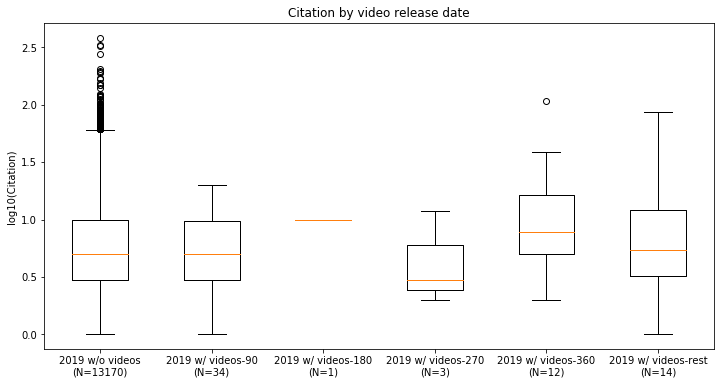

In [39]:
_2019_wo_videos_cit = df1[~df1.DOI.isin(_idx_papers_2019)][df1["Cited by"] != "None"]["Cited by"].dropna().astype(int)
_2019_90_w_videos_cit = df1[df1.DOI.isin(_idx_papers_2019_90)][df1["Cited by"] != "None"]["Cited by"].dropna().astype(int)
_2019_180_w_videos_cit = df1[df1.DOI.isin(_idx_papers_2019_180)][df1["Cited by"] != "None"]["Cited by"].dropna().astype(int)
_2019_270_w_videos_cit = df1[df1.DOI.isin(_idx_papers_2019_270)][df1["Cited by"] != "None"]["Cited by"].dropna().astype(int)
_2019_360_w_videos_cit = df1[df1.DOI.isin(_idx_papers_2019_360)][df1["Cited by"] != "None"]["Cited by"].dropna().astype(int)
_2019_rest_w_videos_cit = df1[df1.DOI.isin(_idx_papers_2019_rest)][df1["Cited by"] != "None"]["Cited by"].dropna().astype(int)

_2019_wo_videos_cit = np.log10(df1[~df1.DOI.isin(_idx_papers_2019)][df1["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2019_90_w_videos_cit = np.log10(df1[df1.DOI.isin(_idx_papers_2019_90)][df1["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2019_180_w_videos_cit = np.log10(df1[df1.DOI.isin(_idx_papers_2019_180)][df1["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2019_270_w_videos_cit = np.log10(df1[df1.DOI.isin(_idx_papers_2019_270)][df1["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2019_360_w_videos_cit = np.log10(df1[df1.DOI.isin(_idx_papers_2019_360)][df1["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2019_rest_w_videos_cit = np.log10(df1[df1.DOI.isin(_idx_papers_2019_rest)][df1["Cited by"] != "None"]["Cited by"].dropna().astype(int))

plt.figure(figsize=(12, 6))
plt.title("Citation by video release date")
# plt.yscale("log")
# plt.ylim([0, 200])
plt.ylabel("log10(Citation)")
plt.boxplot([
    _2019_wo_videos_cit,
    _2019_90_w_videos_cit,
    _2019_180_w_videos_cit,
    _2019_270_w_videos_cit,
    _2019_360_w_videos_cit,
    _2019_rest_w_videos_cit
],
    labels=[
        "2019 w/o videos\n(N=%s)"%len(_2019_wo_videos_cit),
        "2019 w/ videos-90\n(N=%s)"%len(_2019_90_w_videos_cit),
        "2019 w/ videos-180\n(N=%s)"%len(_2019_180_w_videos_cit),
        "2019 w/ videos-270\n(N=%s)"%len(_2019_270_w_videos_cit),
        "2019 w/ videos-360\n(N=%s)"%len(_2019_360_w_videos_cit),
        "2019 w/ videos-rest\n(N=%s)"%len(_2019_rest_w_videos_cit)
    ]
)

In [40]:
_s2019, _p2019 = stats.ttest_ind(
    _2019_wo_videos_cit,
    _2019_90_w_videos_cit
)
print("2019-90\tS = %f\tp = %f"%(_s2019, _p2019))
_s2019, _p2019 = stats.ttest_ind(
    _2019_wo_videos_cit,
    _2019_180_w_videos_cit
)
print("2019-180\tS = %f\tp = %f"%(_s2019, _p2019))
_s2019, _p2019 = stats.ttest_ind(
    _2019_wo_videos_cit,
    _2019_270_w_videos_cit
)
print("2019-270\tS = %f\tp = %f"%(_s2019, _p2019))
_s2019, _p2019 = stats.ttest_ind(
    _2019_wo_videos_cit,
    _2019_360_w_videos_cit
)
print("2019-360\tS = %f\tp = %f"%(_s2019, _p2019))
_s2019, _p2019 = stats.ttest_ind(
    _2019_wo_videos_cit,
    _2019_rest_w_videos_cit
)
print("2019-rest\tS = %f\tp = %f"%(_s2019, _p2019))

2019-90	S = 0.270785	p = 0.786561
2019-180	S = nan	p = nan
2019-270	S = 0.336739	p = 0.736319
2019-360	S = -2.410909	p = 0.015926
2019-rest	S = -1.018102	p = 0.308648


/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


1년된 논문들에 대해서는 전체적으로 유의성이 그다지 안나타난다.

AAS와는?

/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/

{'boxes': [<matplotlib.lines.Line2D at 0x7ff747f1c4a8>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff747f1cc50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff747ea5668>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff747ea5320>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff747f1c5c0>,
  <matplotlib.lines.Line2D at 0x7ff747eceda0>]}

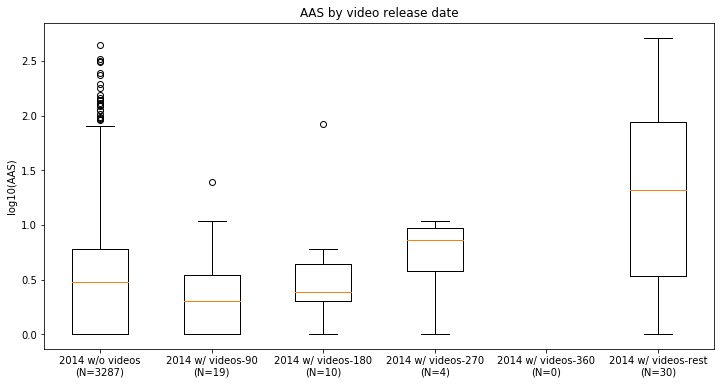

In [41]:
# _2019_90_wo_videos_aas = df1[~df1.DOI.isin(_idx_papers_2019_90)][df1["AAS"] != "None"]["AAS"].dropna().astype(int)
# _2019_90_w_videos_aas = df1[df1.DOI.isin(_idx_papers_2019_90)][df1["AAS"] != "None"]["AAS"].dropna().astype(int)
# _2017_90_wo_videos_aas = df2[~df2.DOI.isin(_idx_papers_2017_90)][df2["AAS"] != "None"]["AAS"].dropna().astype(int)
# _2017_90_w_videos_aas = df2[df2.DOI.isin(_idx_papers_2017_90)][df2["AAS"] != "None"]["AAS"].dropna().astype(int)
# _2014_wo_videos_aas = df3[~df3.DOI.isin(_idx_papers_2014)][df3["AAS"] != "None"]["AAS"].dropna().astype(int)
# _2014_90_w_videos_aas = df3[df3.DOI.isin(_idx_papers_2014_90)][df3["AAS"] != "None"]["AAS"].dropna().astype(int)
# _2014_180_w_videos_aas = df3[df3.DOI.isin(_idx_papers_2014_180)][df3["AAS"] != "None"]["AAS"].dropna().astype(int)
# _2014_270_w_videos_aas = df3[df3.DOI.isin(_idx_papers_2014_270)][df3["AAS"] != "None"]["AAS"].dropna().astype(int)
# _2014_360_w_videos_aas = df3[df3.DOI.isin(_idx_papers_2014_360)][df3["AAS"] != "None"]["AAS"].dropna().astype(int)
# _2014_rest_w_videos_aas = df3[df3.DOI.isin(_idx_papers_2014_rest)][df3["AAS"] != "None"]["AAS"].dropna().astype(int)

_2014_wo_videos_aas = np.log10(df3[~df3.DOI.isin(_idx_papers_2014)][df3["AAS"] != "None"]["AAS"].dropna().astype(int))
_2014_90_w_videos_aas = np.log10(df3[df3.DOI.isin(_idx_papers_2014_90)][df3["AAS"] != "None"]["AAS"].dropna().astype(int))
_2014_180_w_videos_aas = np.log10(df3[df3.DOI.isin(_idx_papers_2014_180)][df3["AAS"] != "None"]["AAS"].dropna().astype(int))
_2014_270_w_videos_aas = np.log10(df3[df3.DOI.isin(_idx_papers_2014_270)][df3["AAS"] != "None"]["AAS"].dropna().astype(int))
_2014_360_w_videos_aas = np.log10(df3[df3.DOI.isin(_idx_papers_2014_360)][df3["AAS"] != "None"]["AAS"].dropna().astype(int))
_2014_rest_w_videos_aas = np.log10(df3[df3.DOI.isin(_idx_papers_2014_rest)][df3["AAS"] != "None"]["AAS"].dropna().astype(int))

plt.figure(figsize=(12, 6))
plt.title("AAS by video release date")
# plt.yscale("log")
# plt.ylim([0, 200])
plt.ylabel("log10(AAS)")
plt.boxplot([
    _2014_wo_videos_aas,
    _2014_90_w_videos_aas,
    _2014_180_w_videos_aas,
    _2014_270_w_videos_aas,
    _2014_360_w_videos_aas,
    _2014_rest_w_videos_aas
],
    labels=[
        "2014 w/o videos\n(N=%s)"%len(_2014_wo_videos_aas),
        "2014 w/ videos-90\n(N=%s)"%len(_2014_90_w_videos_aas),
        "2014 w/ videos-180\n(N=%s)"%len(_2014_180_w_videos_aas),
        "2014 w/ videos-270\n(N=%s)"%len(_2014_270_w_videos_aas),
        "2014 w/ videos-360\n(N=%s)"%len(_2014_360_w_videos_aas),
        "2014 w/ videos-rest\n(N=%s)"%len(_2014_rest_w_videos_aas)
    ]
)

In [42]:
_s2014, _p2014 = stats.ttest_ind(
    _2014_wo_videos_aas,
    _2014_90_w_videos_aas
)
print("2014-90\tS = %f\tp = %f"%(_s2014, _p2014))
_s2014, _p2014 = stats.ttest_ind(
    _2014_wo_videos_aas,
    _2014_180_w_videos_aas
)
print("2014-180\tS = %f\tp = %f"%(_s2014, _p2014))
_s2014, _p2014 = stats.ttest_ind(
    _2014_wo_videos_aas,
    _2014_270_w_videos_aas
)
print("2014-270\tS = %f\tp = %f"%(_s2014, _p2014))
_s2014, _p2014 = stats.ttest_ind(
    _2014_wo_videos_aas,
    _2014_360_w_videos_aas
)
print("2014-360\tS = %f\tp = %f"%(_s2014, _p2014))
_s2014, _p2014 = stats.ttest_ind(
    _2014_wo_videos_aas,
    _2014_rest_w_videos_aas
)
print("2014-rest\tS = %f\tp = %f"%(_s2014, _p2014))

2014-90	S = 1.225888	p = 0.220328
2014-180	S = -0.728006	p = 0.466662
2014-270	S = -1.060892	p = 0.288817
2014-360	S = nan	p = nan
2014-rest	S = -9.774788	p = 0.000000


/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean 

{'boxes': [<matplotlib.lines.Line2D at 0x7ff747e94668>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff747e94e10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff747e1e828>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff747e1e4e0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff747e94780>,
  <matplotlib.lines.Line2D at 0x7ff747e49f60>]}

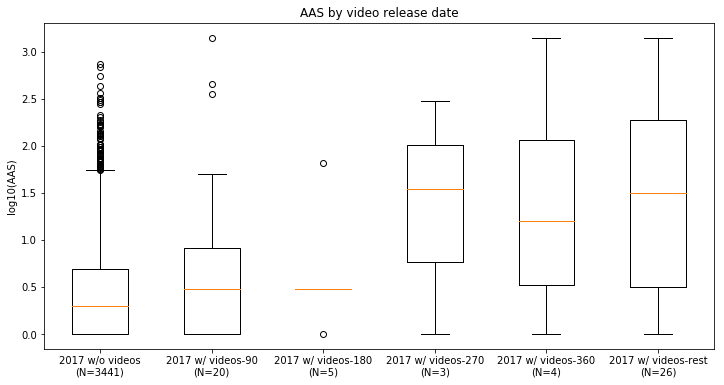

In [43]:
_2017_wo_videos_aas = np.log10(df2[~df2.DOI.isin(_idx_papers_2017)][df2["AAS"] != "None"]["AAS"].dropna().astype(int))
_2017_90_w_videos_aas = np.log10(df2[df2.DOI.isin(_idx_papers_2017_90)][df2["AAS"] != "None"]["AAS"].dropna().astype(int))
_2017_180_w_videos_aas = np.log10(df2[df2.DOI.isin(_idx_papers_2017_180)][df2["AAS"] != "None"]["AAS"].dropna().astype(int))
_2017_270_w_videos_aas = np.log10(df2[df2.DOI.isin(_idx_papers_2017_270)][df2["AAS"] != "None"]["AAS"].dropna().astype(int))
_2017_360_w_videos_aas = np.log10(df2[df2.DOI.isin(_idx_papers_2017_360)][df2["AAS"] != "None"]["AAS"].dropna().astype(int))
_2017_rest_w_videos_aas = np.log10(df2[df2.DOI.isin(_idx_papers_2017_rest)][df2["AAS"] != "None"]["AAS"].dropna().astype(int))

plt.figure(figsize=(12, 6))
plt.title("AAS by video release date")
# plt.yscale("log")
# plt.ylim([0, 200])
plt.ylabel("log10(AAS)")
plt.boxplot([
    _2017_wo_videos_aas,
    _2017_90_w_videos_aas,
    _2017_180_w_videos_aas,
    _2017_270_w_videos_aas,
    _2017_360_w_videos_aas,
    _2017_rest_w_videos_aas
],
    labels=[
        "2017 w/o videos\n(N=%s)"%len(_2017_wo_videos_aas),
        "2017 w/ videos-90\n(N=%s)"%len(_2017_90_w_videos_aas),
        "2017 w/ videos-180\n(N=%s)"%len(_2017_180_w_videos_aas),
        "2017 w/ videos-270\n(N=%s)"%len(_2017_270_w_videos_aas),
        "2017 w/ videos-360\n(N=%s)"%len(_2017_360_w_videos_aas),
        "2017 w/ videos-rest\n(N=%s)"%len(_2017_rest_w_videos_aas)
    ]
)

In [44]:
_s2017, _p2017 = stats.ttest_ind(
    _2017_wo_videos_aas,
    _2017_90_w_videos_aas
)
print("2017-90\tS = %f\tp = %f"%(_s2017, _p2017))
_s2017, _p2017 = stats.ttest_ind(
    _2017_wo_videos_aas,
    _2017_180_w_videos_aas
)
print("2017-180\tS = %f\tp = %f"%(_s2017, _p2017))
_s2017, _p2017 = stats.ttest_ind(
    _2017_wo_videos_aas,
    _2017_270_w_videos_aas
)
print("2017-270\tS = %f\tp = %f"%(_s2017, _p2017))
_s2017, _p2017 = stats.ttest_ind(
    _2017_wo_videos_aas,
    _2017_360_w_videos_aas
)
print("2017-360\tS = %f\tp = %f"%(_s2017, _p2017))
_s2017, _p2017 = stats.ttest_ind(
    _2017_wo_videos_aas,
    _2017_rest_w_videos_aas
)
print("2017-rest\tS = %f\tp = %f"%(_s2017, _p2017))

2017-90	S = -3.254890	p = 0.001145
2017-180	S = -1.044773	p = 0.296201
2017-270	S = -3.200191	p = 0.001386
2017-360	S = -3.870942	p = 0.000110
2017-rest	S = -9.969478	p = 0.000000


/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean 

{'boxes': [<matplotlib.lines.Line2D at 0x7ff747d8dbe0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff747d9a3c8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff747d9ada0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff747d9aa58>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff747d8dcf8>,
  <matplotlib.lines.Line2D at 0x7ff747d4c518>]}

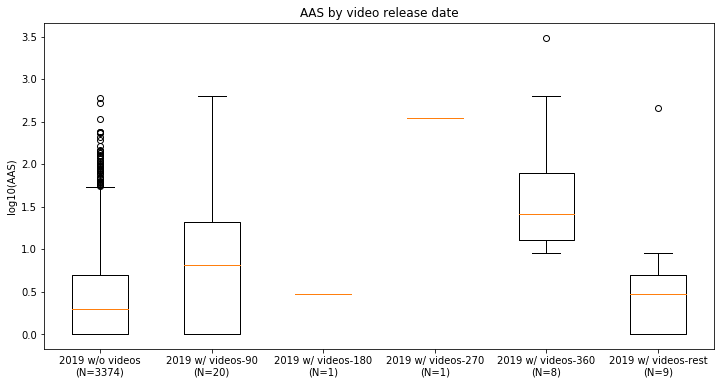

In [46]:
_2019_wo_videos_aas = df1[~df1.DOI.isin(_idx_papers_2019)][df1["AAS"] != "None"]["AAS"].dropna().astype(int)
_2019_90_w_videos_aas = df1[df1.DOI.isin(_idx_papers_2019_90)][df1["AAS"] != "None"]["AAS"].dropna().astype(int)
_2019_180_w_videos_aas = df1[df1.DOI.isin(_idx_papers_2019_180)][df1["AAS"] != "None"]["AAS"].dropna().astype(int)
_2019_270_w_videos_aas = df1[df1.DOI.isin(_idx_papers_2019_270)][df1["AAS"] != "None"]["AAS"].dropna().astype(int)
_2019_360_w_videos_aas = df1[df1.DOI.isin(_idx_papers_2019_360)][df1["AAS"] != "None"]["AAS"].dropna().astype(int)
_2019_rest_w_videos_aas = df1[df1.DOI.isin(_idx_papers_2019_rest)][df1["AAS"] != "None"]["AAS"].dropna().astype(int)

_2019_wo_videos_aas = np.log10(df1[~df1.DOI.isin(_idx_papers_2019)][df1["AAS"] != "None"]["AAS"].dropna().astype(int))
_2019_90_w_videos_aas = np.log10(df1[df1.DOI.isin(_idx_papers_2019_90)][df1["AAS"] != "None"]["AAS"].dropna().astype(int))
_2019_180_w_videos_aas = np.log10(df1[df1.DOI.isin(_idx_papers_2019_180)][df1["AAS"] != "None"]["AAS"].dropna().astype(int))
_2019_270_w_videos_aas = np.log10(df1[df1.DOI.isin(_idx_papers_2019_270)][df1["AAS"] != "None"]["AAS"].dropna().astype(int))
_2019_360_w_videos_aas = np.log10(df1[df1.DOI.isin(_idx_papers_2019_360)][df1["AAS"] != "None"]["AAS"].dropna().astype(int))
_2019_rest_w_videos_aas = np.log10(df1[df1.DOI.isin(_idx_papers_2019_rest)][df1["AAS"] != "None"]["AAS"].dropna().astype(int))

plt.figure(figsize=(12, 6))
plt.title("AAS by video release date")
# plt.yscale("log")
# plt.ylim([0, 200])
plt.ylabel("log10(AAS)")
plt.boxplot([
    _2019_wo_videos_aas,
    _2019_90_w_videos_aas,
    _2019_180_w_videos_aas,
    _2019_270_w_videos_aas,
    _2019_360_w_videos_aas,
    _2019_rest_w_videos_aas
],
    labels=[
        "2019 w/o videos\n(N=%s)"%len(_2019_wo_videos_aas),
        "2019 w/ videos-90\n(N=%s)"%len(_2019_90_w_videos_aas),
        "2019 w/ videos-180\n(N=%s)"%len(_2019_180_w_videos_aas),
        "2019 w/ videos-270\n(N=%s)"%len(_2019_270_w_videos_aas),
        "2019 w/ videos-360\n(N=%s)"%len(_2019_360_w_videos_aas),
        "2019 w/ videos-rest\n(N=%s)"%len(_2019_rest_w_videos_aas)
    ]
)

In [47]:
_s2019, _p2019 = stats.ttest_ind(
    _2019_wo_videos_aas,
    _2019_90_w_videos_aas
)
print("2019-90\tS = %f\tp = %f"%(_s2019, _p2019))
_s2019, _p2019 = stats.ttest_ind(
    _2019_wo_videos_aas,
    _2019_180_w_videos_aas
)
print("2019-180\tS = %f\tp = %f"%(_s2019, _p2019))
_s2019, _p2019 = stats.ttest_ind(
    _2019_wo_videos_aas,
    _2019_270_w_videos_aas
)
print("2019-270\tS = %f\tp = %f"%(_s2019, _p2019))
_s2019, _p2019 = stats.ttest_ind(
    _2019_wo_videos_aas,
    _2019_360_w_videos_aas
)
print("2019-360\tS = %f\tp = %f"%(_s2019, _p2019))
_s2019, _p2019 = stats.ttest_ind(
    _2019_wo_videos_aas,
    _2019_rest_w_videos_aas
)
print("2019-rest\tS = %f\tp = %f"%(_s2019, _p2019))

2019-90	S = -4.108438	p = 0.000041
2019-180	S = nan	p = nan
2019-270	S = nan	p = nan
2019-360	S = -7.753685	p = 0.000000
2019-rest	S = -1.353650	p = 0.175939


Citation, AAS 둘 다, 초창기(90)와 나중(rest)에서 유의하고 180에서 유의성이 낮아지는 경향이 보인다..?
다만 180/270/360은 샘플이 적다는 점